In [126]:
import os
import email
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import string  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt


In [127]:

# Replace 'folder_name' with the name of the folder you're looking for
folder_name = 'SpamAssassinMessages'

# Function to search for the folder recursively
def find_folder(start_dir, folder_name):
    for root, dirs, files in os.walk(start_dir):
        if folder_name in dirs:
            folder_path = os.path.join(root, folder_name)
            print(f"The path of '{folder_name}' is: {folder_path}")
        
# Start the search from the root directory (you can specify a different directory)
start_directory = '/'

find_folder(start_directory, folder_name)


The path of 'SpamAssassinMessages' is: /Users\austi\Downloads\SpamAssassinMessages


In [128]:
count = 0

for root, dirs, files in os.walk('/Users\\austi\\Downloads\\SpamAssassinMessages\\'):
    for file in files:
        print(count)
        print(root, file)
        with open(os.path.join(root, file)) as file_handle:
            message = email.message_from_file(file_handle)
            text_message = message.get_payload()
            print(text_message)
            count += 1


0
/Users\austi\Downloads\SpamAssassinMessages\easy_ham 00001.7c53336b37003a9286aba55d2945844c
    Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ..

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [130]:

directory_path = '/Users\\austi\\Downloads\\SpamAssassinMessages\\easy_ham'

message_list = []

if os.path.exists(directory_path) and os.path.isdir(directory_path):
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            message_list.append(filename)
else:
    print(f"The directory '{directory_path}' does not exist or is not a valid directory.")

print("List of files in the directory:")
print(message_list)


List of files in the directory:
['00001.7c53336b37003a9286aba55d2945844c', '00002.9c4069e25e1ef370c078db7ee85ff9ac', '00003.860e3c3cee1b42ead714c5c874fe25f7', '00004.864220c5b6930b209cc287c361c99af1', '00005.bf27cdeaf0b8c4647ecd61b1d09da613', '00006.253ea2f9a9cc36fa0b1129b04b806608', '00007.37a8af848caae585af4fe35779656d55', '00008.5891548d921601906337dcf1ed8543cb', '00009.371eca25b0169ce5cb4f71d3e07b9e2d', '0001.ea7e79d3153e7469e7a9c3e0af6a357e', '00010.145d22c053c1a0c410242e46c01635b3', '00011.fbcde1b4833bdbaaf0ced723edd6e355', '00012.48a387bc38d1316a6f6b49e8c2e43a03', '00013.81c34741dbed59c6dde50777e27e7ea3', '00014.cb20e10b2bfcb8210a1c310798532a57', '00015.4d7026347ba7478c9db04c70913e68fd', '00016.ef397cef16f8041242e3b6560e168053', '00017.08ef2d89f14cf7e2a458b80697eb1837', '00018.6fee38026193b5adde4b56892a6f14bc', '00019.5322cb10d8819b39499924d852819c27', '0002.b3120c4bcbf3101e661161ee7efcb8bf', '00020.d10651e31fcb92630c6229ec773cfe26', '00021.607c41268c5b0d66e81b58713a66d12c', '00

In [131]:

count = 0
for i in message_list:
  with open(os.path.join('/Users\\austi\\Downloads\\SpamAssassinMessages\\easy_ham', i)) as file_handle:
    message = file_handle.read()
  count = count + 1
  if count % 10 == 0:
    pass
    # print(count)
print(count)
# should be 5052 for easy ham

5052


In [132]:
file_name = []
label = []
for root, dirs, files in os.walk(r'/Users\\austi\\Downloads\\SpamAssassinMessages\\'):
  for file in files:
    if 'spam' in root:
      label.append(1)
    else:
      label.append(0)
    file_name.append(os.path.join(root, file))

In [133]:
data = pd.DataFrame({'MessageFile': file_name, 'Target':label})

In [134]:
data

,MessageFile,Target
0,/Users\\austi\\Downloads\\SpamAssassinMessages...,0
1,/Users\\austi\\Downloads\\SpamAssassinMessages...,0
2,/Users\\austi\\Downloads\\SpamAssassinMessages...,0
3,/Users\\austi\\Downloads\\SpamAssassinMessages...,0
4,/Users\\austi\\Downloads\\SpamAssassinMessages...,0
...,...,...
9348,/Users\\austi\\Downloads\\SpamAssassinMessages...,1
9349,/Users\\austi\\Downloads\\SpamAssassinMessages...,1
9350,/Users\\austi\\Downloads\\SpamAssassinMessages...,1
9351,/Users\\austi\\Downloads\\SpamAssassinMessages...,1


In [135]:
# with open(os.path.join('/Users\\austi\\Downloads\\SpamAssassinMessages\\easy_ham', message_list[0])) as file_handle:
#   message = email.message_from_file(file_handle)

In [136]:
# print(message.get_payload())

In [137]:
# for root, dirs, files in os.walk(r'/Users\\austi\\Downloads\\SpamAssassinMessages\\'):
#   for file in files:
#     with open(os.path.join(root, file)) as file_handle:
#       message = email.message_from_file(file_handle)
#       text_message = message.get_payload()

# THIS WILL GET AN ERROR... THIS IS THE POINT OF THE ASSIGNMENT

In [138]:
msgs = []

directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding = 'latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            body = message.get_payload()
            msgs.append(body)
            
print('remember all the multipart messages!!!')


remember all the multipart messages!!!


In [139]:
msgs[0]

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.c

In [140]:
msg_df = pd.DataFrame({'Message Body': msgs})

msg_df

,Message Body
0,"Date: Wed, 21 Aug 2002 10:54:46 -05..."
1,"Martin A posted:\nTassos Papadopoulos, the Gre..."
2,Man Threatens Explosion In Moscow \n\nThursday...
3,Klez: The Virus That Won't Die\n \nAlready the...
4,"> in adding cream to spaghetti carbonara, whi..."
...,...
9348,"[[Content-Type, Content-Transfer-Encoding], [C..."
9349,"Dear Subscriber,\n\nIf I could show you a way ..."
9350,****Mid-Summer Customer Appreciation SALE!****...
9351,ATTN:SIR/MADAN \n\n ...


In [141]:
#### Comibniing stuff... more finalized ####

In [142]:
# directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

# file_name = []
# label = []
# msgs = []

# for root, dirs, files in os.walk(directory_path):
#     for file in files:
#         file_path = os.path.join(root, file)
        
#         if 'spam' in root:
#             label.append(1)
#         else:
#             label.append(0)
        
#         with open(file_path, 'r', encoding='latin-1') as file_handle:
#             message = email.message_from_file(file_handle)
#             body = message.get_payload()
#             msgs.append(body)
            
#         file_name.append(file_path)

# data = {'File Name': file_name, 'Label': label, 'Message': msgs}
# df = pd.DataFrame(data)
# df

In [143]:
directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

file_name = []
label = []
msgs = []

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        
        if 'spam' in root:
            label.append(1)
        else:
            label.append(0)
        
        with open(file_path, 'r', encoding='latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            body = str(message.get_payload())
            body = body.lower()
            body = ''.join([char for char in body if char not in string.punctuation])
            msgs.append(body)
            
        file_name.append(file_path)

data = {'File Name': file_name, 'Label': label, 'Message': msgs}

df = pd.DataFrame(data)

df


,File Name,Label,Message
0,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,date wed 21 aug 2002 105446 0500\n ...
1,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,martin a posted\ntassos papadopoulos the greek...
2,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,man threatens explosion in moscow \n\nthursday...
3,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,klez the virus that wont die\n \nalready the m...
4,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,in adding cream to spaghetti carbonara which...
...,...,...,...
9348,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,emailmessagemessage object at 0x0000028f83e7e0...
9349,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,dear subscriber\n\nif i could show you a way t...
9350,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,midsummer customer appreciation sale\n\nto exp...
9351,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,attnsirmadan \n\n st...


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], 
                                                    df['Label'],
                                                    test_size = 0.2,
                                                    random_state = 42)

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_transformed, y_train)

y_pred = nb_classifier.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy, 2)}')

Accuracy: 0.88


In [145]:
class_report = classification_report(y_test, y_pred)

print('Classification Report:\n')
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1391
           1       0.99      0.52      0.68       480

    accuracy                           0.88      1871
   macro avg       0.93      0.76      0.80      1871
weighted avg       0.89      0.88      0.86      1871



In [146]:
############### TESTING BELOW ##################

In [147]:
import pandas as pd
import os
import email
import string

def extract_sender(message):
    sender = "None"  

    if "From" in message:
        sender = message["From"]

    return sender

directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

file_name = []
label = []
msgs = []
senders = [] 

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        
        if 'spam' in root:
            label.append(1)
        else:
            label.append(0)
        
        with open(file_path, 'r', encoding='latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            body = str(message.get_payload())
            body = body.lower()
            body = ''.join([char for char in body if char not in string.punctuation])
            msgs.append(body)
            
            sender = extract_sender(message)
            senders.append(sender)
            
        file_name.append(file_path)

data = {'File Name': file_name, 'Label': label, 'Message': msgs, 'Sender': senders}

df = pd.DataFrame(data)

df


,File Name,Label,Message,Sender
0,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,date wed 21 aug 2002 105446 0500\n ...,Robert Elz <kre@munnari.OZ.AU>
1,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,martin a posted\ntassos papadopoulos the greek...,Steve Burt <Steve_Burt@cursor-system.com>
2,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,man threatens explosion in moscow \n\nthursday...,"""Tim Chapman"" <timc@2ubh.com>"
3,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,klez the virus that wont die\n \nalready the m...,Monty Solomon <monty@roscom.com>
4,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,in adding cream to spaghetti carbonara which...,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>
...,...,...,...,...
9348,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,emailmessagemessage object at 0x0000028f83d42f...,"""IQ - TBA"" <tba@insiq.us>"
9349,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,dear subscriber\n\nif i could show you a way t...,Mike <raye@yahoo.lv>
9350,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,midsummer customer appreciation sale\n\nto exp...,"""Mr. Clean"" <cweqx@dialix.oz.au>"
9351,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,attnsirmadan \n\n st...,"""wilsonkamela400@netscape.net"" <wilsonkamela50..."


In [148]:
stop_words = list(ENGLISH_STOP_WORDS)

X_train, X_test, y_train, y_test = train_test_split(df['Message'], 
                                                    df['Label'],
                                                    test_size = 0.2,
                                                    random_state = 42)

vectorizer = TfidfVectorizer(stop_words = stop_words)

X_train_transformed = vectorizer.fit_transform(X_train)

X_test_transformed = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_transformed, y_train)

y_pred = nb_classifier.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy, 2)}')


Accuracy: 0.9


In [149]:
class_report = classification_report(y_test, y_pred)

print('Classification Report:\n')
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1391
           1       0.99      0.60      0.75       480

    accuracy                           0.90      1871
   macro avg       0.93      0.80      0.84      1871
weighted avg       0.91      0.90      0.89      1871



In [150]:
stop_words = list(ENGLISH_STOP_WORDS)
X_train, X_test, y_train, y_test = train_test_split(df['Message'], 
                                                    df['Label'],
                                                    test_size = 0.2,
                                                    random_state = 42)

alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]
accuracy_results = {}

for alpha in alpha_values:
    vectorizer = TfidfVectorizer(stop_words = stop_words)
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    
    nb_classifier = MultinomialNB(alpha = alpha)
    nb_classifier.fit(X_train_transformed, y_train)
    
    y_pred = nb_classifier.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[alpha] = accuracy

for alpha, accuracy in accuracy_results.items():
    print(f'Alpha = {alpha}: Accuracy = {round(accuracy, 2)}')

Alpha = 0.1: Accuracy = 0.95
Alpha = 0.5: Accuracy = 0.92
Alpha = 1.0: Accuracy = 0.9
Alpha = 1.5: Accuracy = 0.88
Alpha = 2.0: Accuracy = 0.87


In [151]:
stop_words = list(ENGLISH_STOP_WORDS)
X_train, X_test, y_train, y_test = train_test_split(df['Message'], 
                                                    df['Label'],
                                                    test_size = 0.2,
                                                    random_state = 42)

alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]

for alpha in alpha_values:
    vectorizer = TfidfVectorizer(stop_words = stop_words)
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)
    
    nb_classifier = MultinomialNB(alpha = alpha)
    nb_classifier.fit(X_train_transformed, y_train)
    
    y_pred = nb_classifier.predict(X_test_transformed)
    
    report = classification_report(y_test, y_pred)
    print(f'Alpha = {alpha}\n{report}\n')
    print('--------------------------------------------------------')

Alpha = 0.1
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1391
           1       0.88      0.95      0.91       480

    accuracy                           0.95      1871
   macro avg       0.93      0.95      0.94      1871
weighted avg       0.96      0.95      0.96      1871


--------------------------------------------------------
Alpha = 0.5
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1391
           1       0.97      0.71      0.82       480

    accuracy                           0.92      1871
   macro avg       0.94      0.85      0.88      1871
weighted avg       0.92      0.92      0.91      1871


--------------------------------------------------------
Alpha = 1.0
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1391
           1       0.99      0.60      0.75       480

    accuracy                  

In [152]:
feature_names = np.array(vectorizer.get_feature_names_out())

log_probabilities = nb_classifier.feature_log_prob_

feature_df = pd.DataFrame({'Feature': feature_names, 
                           'Log Probability': log_probabilities[1]})  

feature_df = feature_df.sort_values(by = 'Log Probability', 
                                    ascending = True)

N = 10  
top_words = feature_df.head(N)

print('Top Words with Greatest Impact on the Model (Alpha = 0.1):')
print(top_words.to_string(index = False))


Top Words with Greatest Impact on the Model (Alpha = 0.1):
                                                         Feature  Log Probability
                         httpcoolstopcomradiocategoriesinfofeeds       -11.723197
                                   httpwwwfoolofatookcomlotrblog       -11.723197
                                      httpwwwfoolishvisionscommt       -11.723197
                                           httpwwwfoolishnessnet       -11.723197
                                       httpwwwfoolcommaspi562086       -11.723197
                                       httpwwwfoolcommaspi562085       -11.723197
                                       httpwwwfoolcommaspi562084       -11.723197
                                       httpwwwfoolcommaspi562083       -11.723197
httpwwwforbescomfinancemktguideappscompinfocompanytearsheetjhtml       -11.723197
                                       httpwwwfoolcommaspi562082       -11.723197


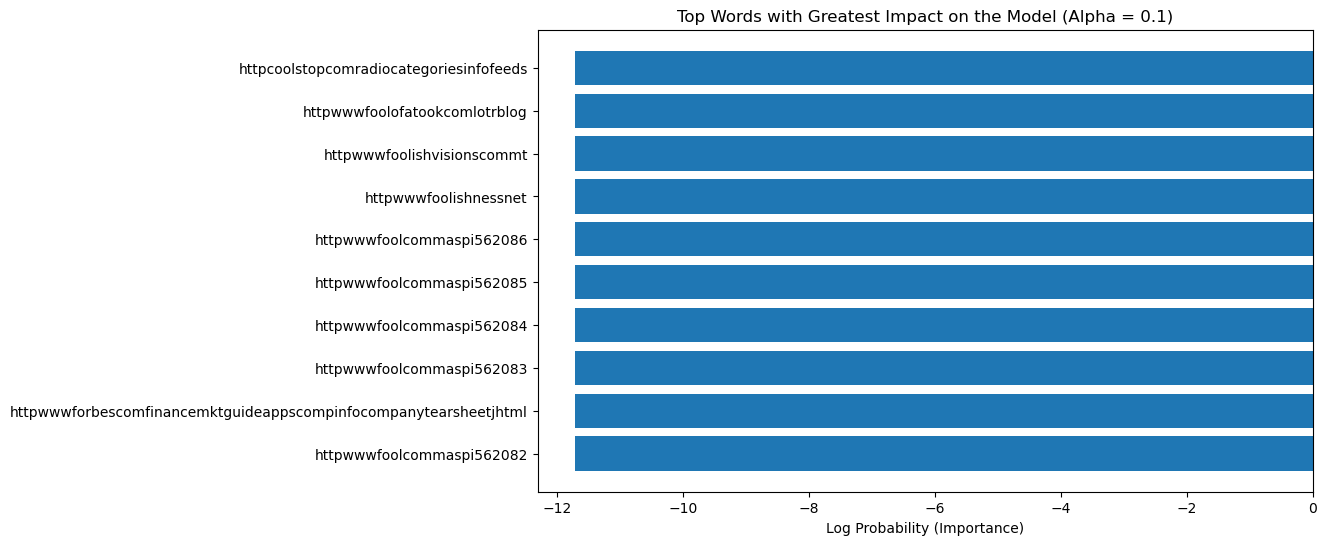

In [153]:
plt.figure(figsize = (10, 6))
plt.barh(top_words['Feature'], top_words['Log Probability'])
plt.xlabel('Log Probability (Importance)')
plt.title('Top Words with Greatest Impact on the Model (Alpha = 0.1)')
plt.gca().invert_yaxis() 
plt.show()

In [154]:
############### TESTING BELOW ##################

In [155]:
import pandas as pd
import os
import email
import string

def extract_email_content(message):
    text_content = ""
    html_content = ""
    attachments = []

    if message.is_multipart():
        for part in message.walk():
            content_type = part.get_content_type()
            disposition = str(part.get("Content-Disposition"))

            if "attachment" in disposition:
                filename = part.get_filename()
                if filename:
                    attachments.append(filename)
            else:
                if content_type == "text/plain":
                    text_content += part.get_payload(decode=True).decode('utf-8', 'ignore')
                elif content_type == "text/html":
                    html_content += part.get_payload(decode=True).decode('utf-8', 'ignore')

    else:
        text_content = message.get_payload(decode=True).decode('utf-8', 'ignore')

    return text_content, html_content, attachments

directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

file_name = []
label = []
text_contents = []
html_contents = []
attachments_list = []

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)

        if 'spam' in root:
            label.append(1)
        else:
            label.append(0)

        with open(file_path, 'r', encoding='latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            text_content, html_content, attachments = extract_email_content(message)
            text_content = text_content.lower()
            text_content = ''.join([char for char in text_content if char not in string.punctuation])

            file_name.append(file_path)
            text_contents.append(text_content)
            html_contents.append(html_content)
            attachments_list.append(attachments)

data = {'File Name': file_name, 'Label': label, 'Text Content': text_contents, 'HTML Content': html_contents, 'Attachments': attachments_list}
df = pd.DataFrame(data)

df


,File Name,Label,Text Content,HTML Content,Attachments
0,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,date wed 21 aug 2002 105446 0500\n ...,,[]
1,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,martin a posted\ntassos papadopoulos the greek...,,[]
2,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,man threatens explosion in moscow \n\nthursday...,,[]
3,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,klez the virus that wont die\n \nalready the m...,,[]
4,/Users/austi/Downloads/SpamAssassinMessages/ea...,0,in adding cream to spaghetti carbonara which...,,[]
...,...,...,...,...,...
9348,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,\t preferred nonsmoker\n \t\n just what the d...,<html>\n<head>\n<title>Preferred Non-Smoker Ra...,[]
9349,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,dear subscriber\n\nif i could show you a way t...,,[]
9350,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,midsummer customer appreciation sale\n\nto exp...,,[]
9351,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,attnsirmadan \n\n st...,,[]


In [156]:
# Combine Text Content and HTML Content columns
df['Combined Content'] = df['Text Content'] + ' ' + df['HTML Content']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Combined Content'], df['Label'], test_size=0.2, random_state=42)

# Vectorize the combined content using TF-IDF
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_transformed)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy, 3)}')

Accuracy: 0.905


In [157]:
class_report = classification_report(y_test, y_pred)

print('Classification Report:\n')
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1391
           1       0.97      0.65      0.78       480

    accuracy                           0.90      1871
   macro avg       0.93      0.82      0.86      1871
weighted avg       0.91      0.90      0.90      1871



In [158]:
directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

file_name = []
label = []
msgs = []

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        
        if 'spam' in root:
            label.append(1)
        else:
            label.append(0)
        
        with open(file_path, 'r', encoding = 'latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            body = str(message.get_payload())
            body = body.lower()  
            body = ''.join([char for char in body if char not in string.punctuation])  
            msgs.append(body)
            
        file_name.append(file_path)

data = {'File Name': file_name, 'Label': label, 'Message': msgs}
df = pd.DataFrame(data)

df_spam = df[df['Label'] == 1]
df_non_spam = df[df['Label'] == 0]

vectorizer = TfidfVectorizer()
X_spam = vectorizer.fit_transform(df_spam['Message'])

nb_classifier = MultinomialNB()
nb_classifier.fit(X_spam, df_spam['Label'])

X_non_spam = vectorizer.transform(df_non_spam['Message'])

df_non_spam['Predicted_Label'] = nb_classifier.predict(X_non_spam)

df_combined = pd.concat([df_spam, df_non_spam], ignore_index = True)
df_combined


C:\Users\austi\AppData\Local\Temp\ipykernel_2136\444231273.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_spam['Predicted_Label'] = nb_classifier.predict(X_non_spam)


,File Name,Label,Message,Predicted_Label
0,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,doctype html public w3cdtd html 40 transitiona...,NaN
1,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,1 fight the risk of cancer\nhttpwwwadclickwspc...,NaN
2,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,1 fight the risk of cancer\nhttpwwwadclickwspc...,NaN
3,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,\n ...,NaN
4,/Users/austi/Downloads/SpamAssassinMessages/sp...,1,i thought you might like these\n1 slim down g...,NaN
...,...,...,...,...
9348,/Users/austi/Downloads/SpamAssassinMessages/ha...,0,i am trying to secure three of four virtual ho...,1.0
9349,/Users/austi/Downloads/SpamAssassinMessages/ha...,0,filled with useful examples and the depth clar...,1.0
9350,/Users/austi/Downloads/SpamAssassinMessages/ha...,0,linuxannounce digest 180 volume 4 sa...,1.0
9351,/Users/austi/Downloads/SpamAssassinMessages/ha...,0,\n\n\nthis is an official mailing from source...,1.0


In [159]:
# def extract_info(message_body):
#     if isinstance(message_body, str):
#         date_pattern = r'Date:\s+(.*)'
#         from_pattern = r'From:\s+(.*)'
#         message_id_pattern = r'Message-ID:\s+(.*)'

#         date_match = re.search(date_pattern, message_body)
#         from_match = re.search(from_pattern, message_body)
#         message_id_match = re.search(message_id_pattern, message_body)

#         return {
#             'Date': date_match.group(1) if date_match else None,
#             'From': from_match.group(1) if from_match else None,
#             'Message-ID': message_id_match.group(1) if message_id_match else None,
#         }
#     else:
#         return {
#             'Date': None,
#             'From': None,
#             'Message-ID': None,
#         }

In [160]:
# msg_df[['Date', 'From', 'Message-ID']] = msg_df['Message Body'].apply(lambda x: pd.Series(extract_info(x)))


In [161]:
msg_df

,Message Body
0,"Date: Wed, 21 Aug 2002 10:54:46 -05..."
1,"Martin A posted:\nTassos Papadopoulos, the Gre..."
2,Man Threatens Explosion In Moscow \n\nThursday...
3,Klez: The Virus That Won't Die\n \nAlready the...
4,"> in adding cream to spaghetti carbonara, whi..."
...,...
9348,"[[Content-Type, Content-Transfer-Encoding], [C..."
9349,"Dear Subscriber,\n\nIf I could show you a way ..."
9350,****Mid-Summer Customer Appreciation SALE!****...
9351,ATTN:SIR/MADAN \n\n ...


In [162]:
msgs = []
types = []

directory_path = r'/Users/austi/Downloads/SpamAssassinMessages/'

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        with open(file_path, 'r', encoding = 'latin-1') as file_handle:
            message = email.message_from_file(file_handle)
            type_ = message.get_content_type()
            types[type_] += 1
            if type_ == 'multipart/mixed' and trigger:
                print(root, file)
                print('___________________')
                trigger = False
            body = message.get_payload()
            
print(types)            
print('remember all the multipart messages!!!')

TypeError: list indices must be integers or slices, not str